<a href="https://colab.research.google.com/github/Pavansai0099/python-AI_OPENAI-MACHINE-LEARNING/blob/main/brain_tumor_detection_from_mri_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
!pip install  opencv-python

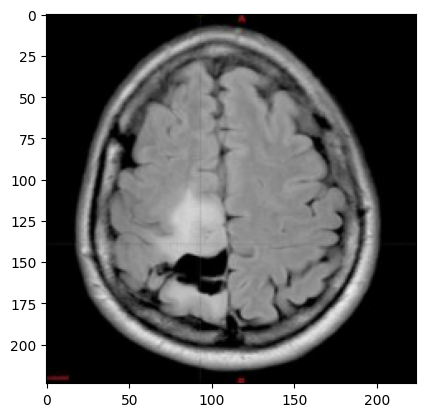

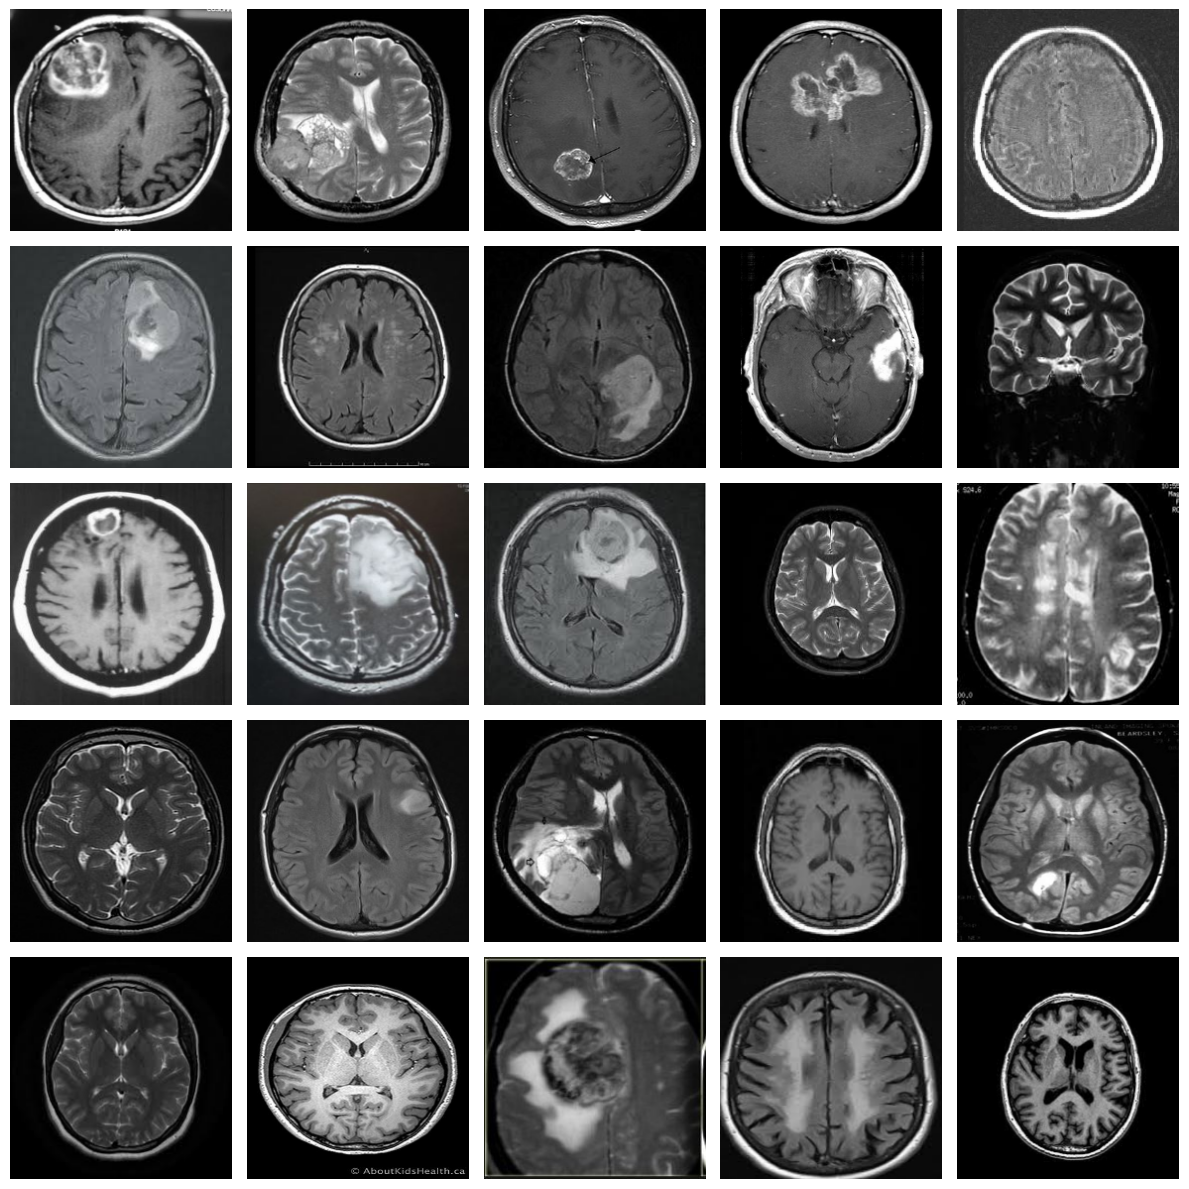

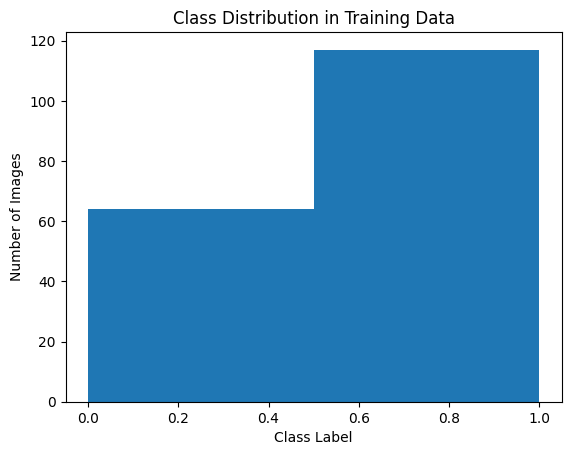

Epoch 1/10
6/6 [==============================] - 2s 101ms/step - loss: 2.5570 - accuracy: 0.4365 - val_loss: 0.4981 - val_accuracy: 0.8095
Epoch 2/10
6/6 [==============================] - 0s 56ms/step - loss: 0.5366 - accuracy: 0.7735 - val_loss: 0.5636 - val_accuracy: 0.7143
Epoch 3/10
6/6 [==============================] - 0s 49ms/step - loss: 0.4630 - accuracy: 0.8122 - val_loss: 0.5586 - val_accuracy: 0.7619
Epoch 4/10
6/6 [==============================] - 0s 50ms/step - loss: 0.4086 - accuracy: 0.8177 - val_loss: 0.4547 - val_accuracy: 0.8095
Epoch 5/10
6/6 [==============================] - 0s 49ms/step - loss: 0.3152 - accuracy: 0.8729 - val_loss: 0.4162 - val_accuracy: 0.8095
Epoch 6/10
6/6 [==============================] - 0s 46ms/step - loss: 0.2312 - accuracy: 0.9227 - val_loss: 0.4597 - val_accuracy: 0.8571
Epoch 7/10
6/6 [==============================] - 0s 47ms/step - loss: 0.1457 - accuracy: 0.9724 - val_loss: 0.5474 - val_accuracy: 0.8571
Epoch 8/10
6/6 [==========

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
import warnings
warnings.filterwarnings('ignore')
import cv2
import glob

path_No = '/content/drive/MyDrive/Colab Notebooks/img dataset/no'
path_Yes = '/content/drive/MyDrive/Colab Notebooks/img dataset/yes'

tumor = []
no_tumor = []

random_state = 42

for file in glob.iglob(f"{path_Yes}/*"):
    img = cv2.imread(file)
    if img is None:
        print(f"Failed to read image: {file}")
        continue  # Skip this iteration if the image could not be read
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (224, 224))
    tumor.append((img, 1))

for file in glob.iglob(f"{path_No}/*"):
    img = cv2.imread(file)
    if img is None:
        print(f"Failed to read image: {file}")
        continue
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (224, 224))
    no_tumor.append((img, 0))

all_data = tumor + no_tumor

data = np.array([item[0] for item in all_data])
labels = np.array([item[1] for item in all_data])

# displays a single image from the data
plt.imshow(data[20])

# Visualizing a Grid of Random Images
import matplotlib.pyplot as plt
import numpy as np

# Define number of rows and columns for the grid
num_rows = 5
num_cols = 5

# Randomly select indices for images
image_indices = np.random.randint(0, len(data), size=num_rows * num_cols)

# Create a figure and subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 12))

# Plot random images
for i in range(num_rows):
  for j in range(num_cols):
    index = image_indices[i * num_cols + j]
    axes[i, j].imshow(data[index])
    axes[i, j].axis('off')

plt.tight_layout()
plt.show()

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=random_state)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=random_state)

X_train = X_train / 255.0
X_val = X_val / 255.0
X_test = X_test / 255.0

plt.hist(y_train, bins=2)  # Bins for tumor (1) and no tumor (0)
plt.xlabel('Class Label')
plt.ylabel('Number of Images')
plt.title('Class Distribution in Training Data')
plt.show()

from tensorflow import keras

model = keras.Sequential([
  keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
  keras.layers.MaxPooling2D((2, 2)),
  keras.layers.Conv2D(64, (3, 3), activation='relu'),
  keras.layers.MaxPooling2D((2, 2)),
  keras.layers.Flatten(),
  keras.layers.Dense(64, activation='relu'),
  keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

from tensorflow.keras.utils import plot_model

plot_model(model, to_file='model_architecture.png', show_shapes=True)

loss, accuracy = model.evaluate(X_test, y_test)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

In [17]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Model

# Define input shape (assuming your images are 224x224 with 3 channels)
input_shape = (224, 224, 3)

# Define the model layers
inputs = Input(shape=input_shape)  # Input layer

# Feature extraction layers
x = Conv2D(filters=32, kernel_size=(3, 3), activation='relu')(inputs)  # Convolutional layer 1
x = MaxPooling2D(pool_size=(2, 2))(x)  # Max pooling layer 1
x = Conv2D(filters=64, kernel_size=(3, 3), activation='relu')(x)  # Convolutional layer 2
x = MaxPooling2D(pool_size=(2, 2))(x)  # Max pooling layer 2

# Flatten the feature maps
x = Flatten()(x)

# Classification layers
x = Dense(units=128, activation='relu')(x)  # Fully connected layer 1

outputs = Dense(units=1, activation='sigmoid')(x)  # Output layer with sigmoid for binary classification

# Create the model
model = Model(inputs=inputs, outputs=outputs)

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model (replace with your training data)
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_acc)

history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Extract training and validation loss/accuracy from history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Plot training and validation loss/accuracy
epochs = range(len(train_loss))  # Get number of epochs
plt.figure(figsize=(10, 6))

Epoch 1/10
6/6 [==============================] - 2s 140ms/step - loss: 2.8602 - accuracy: 0.4586 - val_loss: 0.9693 - val_accuracy: 0.7059
Epoch 2/10
6/6 [==============================] - 0s 67ms/step - loss: 0.7107 - accuracy: 0.7293 - val_loss: 0.4982 - val_accuracy: 0.8039
Epoch 3/10
6/6 [==============================] - 0s 63ms/step - loss: 0.4234 - accuracy: 0.8619 - val_loss: 0.5264 - val_accuracy: 0.8039
Epoch 4/10
6/6 [==============================] - 0s 65ms/step - loss: 0.3197 - accuracy: 0.8674 - val_loss: 0.5512 - val_accuracy: 0.7843
Epoch 5/10
6/6 [==============================] - 0s 64ms/step - loss: 0.1832 - accuracy: 0.9448 - val_loss: 0.5026 - val_accuracy: 0.8039
Epoch 6/10
6/6 [==============================] - 0s 67ms/step - loss: 0.1023 - accuracy: 0.9724 - val_loss: 0.6962 - val_accuracy: 0.8039
Epoch 7/10
6/6 [==============================] - 0s 58ms/step - loss: 0.0413 - accuracy: 0.9945 - val_loss: 1.0059 - val_accuracy: 0.7647
Epoch 8/10
6/6 [==========

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

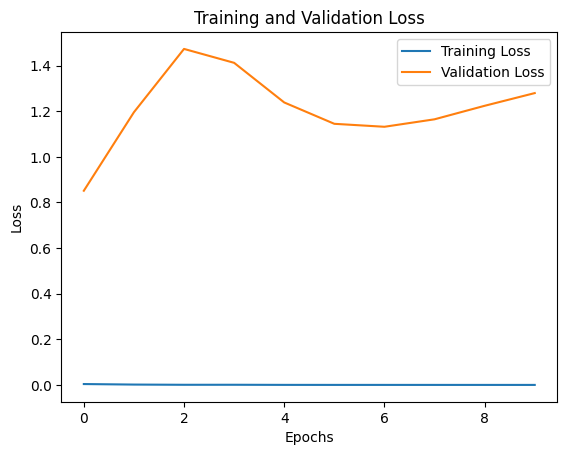

<Figure size 1000x600 with 0 Axes>

In [18]:
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.figure(figsize=(10, 6))

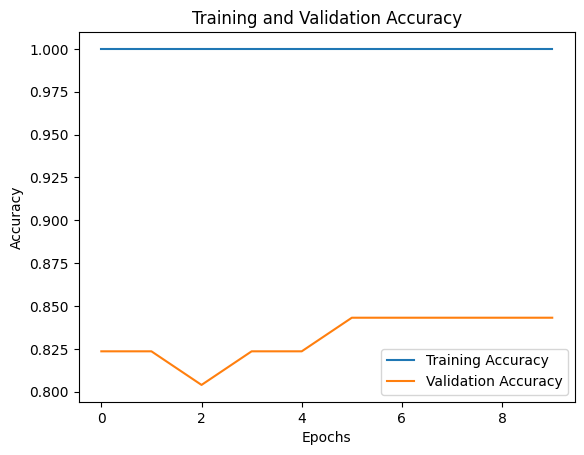

In [19]:
plt.plot(epochs, train_acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()